In [1]:
import os, time
import numpy as np 
from simbig import halos as Halos
from simbig import galaxies as Galaxies
from simbig import forwardmodel as FM

In [2]:
# --- plotting ---
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

# Read in `Quijote` Halo Catalog
I'm using `i=1118`th cosmology in the LHC because that's the closest to the cosmology used in Manera+(2015)

In [3]:
# read in halo catalog
t0 = time.time()
halos = Halos.Quijote_LHC_HR(1118, z=0.5)
print('halo readin takes %f sec' % ((time.time() - t0)))

halo readin takes 0.201596 sec


This halo catalog has the following cosmology

In [4]:
print('Om, Ob, h, ns, s8:')
print(Halos.Quijote_LHC_cosmo(1118))

Om, Ob, h, ns, s8:
(0.2671, 0.03993, 0.6845, 0.96030000000000004, 0.78549999999999998)


# Populate halos with HOD
We'll use best-fit HOD parameters for LOWZ

In [5]:
# get LOWZ HOD parameters
theta_hod = Galaxies.thetahod_lowz_sgc()

Now apply HOD. This populates the halo catalog in a box with galaxies

In [6]:
# apply HOD
t0 = time.time()
hod = Galaxies.hodGalaxies(halos, theta_hod, seed=0)
print('HOD takes %f sec' % ((time.time() - t0)))

HOD takes 8.722435 sec


In [7]:
# galaxy positions 
pos = np.array(hod['Position'])

(-100.0, 1100.0)

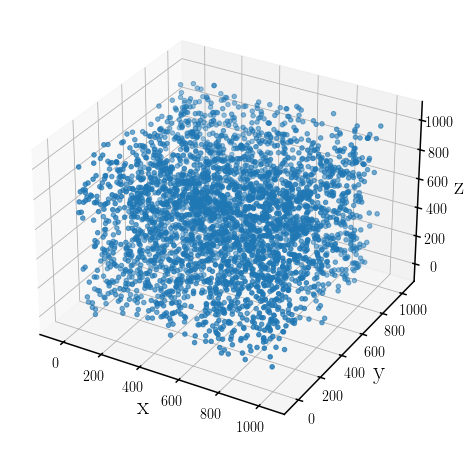

In [8]:
fig = plt.figure(figsize=(8,8))
sub = fig.add_subplot(projection='3d')
sub.scatter(pos[::100, 0], pos[::100, 1], pos[::100, 2], c='C0')
sub.set_xlabel('x', fontsize=25)
sub.set_xlim(-100, 1100)
sub.set_ylabel('y', fontsize=25)
sub.set_ylim(-100, 1100)
sub.set_zlabel('z', fontsize=25)
sub.set_zlim(-100, 1100)

# Applying the forward model
Now lets apply the forward model with different levels of realism: 
1. only BOSS LOWZ South survey geometry
2. with veto mask
3. with fiber collisions

In [9]:
# apply forward model without veto mask, without fiber collisions
t0 = time.time()
gals = FM.BOSS(hod, sample='lowz-south', seed=0, veto=False, fiber_collision=False, silent=False)
print('forward model takes %f sec' % ((time.time() - t0)))

..applying angular mask takes 1 sec
..applying radial selection
..footprint covers 0.067 of sky
forward model takes 8.036316 sec


Text(0, 0.5, 'Dec')

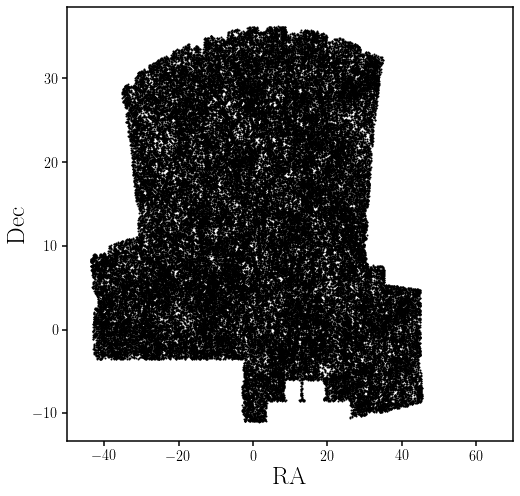

In [10]:
fig = plt.figure(figsize=(8,8))
sub = fig.add_subplot(111)
sub.scatter(np.array(gals['RA']), np.array(gals['DEC']), c='k', s=1, rasterized=True)
sub.scatter(np.array(gals['RA'])-360, np.array(gals['DEC']), c='k', s=1, rasterized=True)
sub.set_xlabel('RA', fontsize=25)
sub.set_xlim(-50, 70)
sub.set_ylabel('Dec', fontsize=25)

In [11]:
# apply forward model without veto mask, without fiber collisions
t0 = time.time()
gals_veto = FM.BOSS(hod, sample='lowz-south', seed=0, veto=True, fiber_collision=False, silent=False)
print('forward model takes %f sec' % ((time.time() - t0)))

..applying angular mask takes 1 sec
..applying veto takes 24 sec
..applying radial selection
..footprint covers 0.061 of sky
forward model takes 32.020295 sec


Text(0, 0.5, 'Dec')

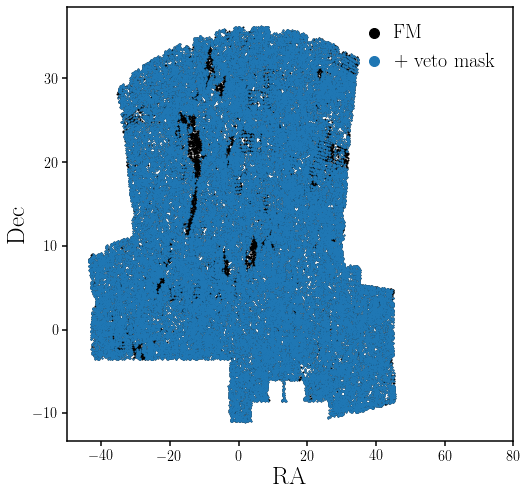

In [12]:
fig = plt.figure(figsize=(8,8))
sub = fig.add_subplot(111)
sub.scatter(np.array(gals['RA']), np.array(gals['DEC']), c='k', s=1, rasterized=True, label='FM')
sub.scatter(np.array(gals['RA'])-360, np.array(gals['DEC']), c='k', s=1, rasterized=True)
sub.scatter(np.array(gals_veto['RA']), np.array(gals_veto['DEC']), c='C0', s=1, rasterized=True, label='+ veto mask')
sub.scatter(np.array(gals_veto['RA'])-360, np.array(gals_veto['DEC']), c='C0', s=1, rasterized=True)
sub.legend(loc='upper right', handletextpad=0, markerscale=10, fontsize=20)
sub.set_xlabel('RA', fontsize=25)
sub.set_xlim(-50, 80)
sub.set_ylabel('Dec', fontsize=25)

In [13]:
# apply forward model without veto mask, without fiber collisions
t0 = time.time()
gals_veto_fc = FM.BOSS(hod, sample='lowz-south', seed=0, veto=True, fiber_collision=True, silent=False)
print('forward model takes %f sec' % ((time.time() - t0)))

..applying angular mask takes 1 sec
..applying veto takes 23 sec
..applying radial selection
spherematch takes 9.323500 sec
..applying fiber collisions takes 9 sec
..footprint covers 0.061 of sky
forward model takes 40.781615 sec


Text(0, 0.5, 'Dec')

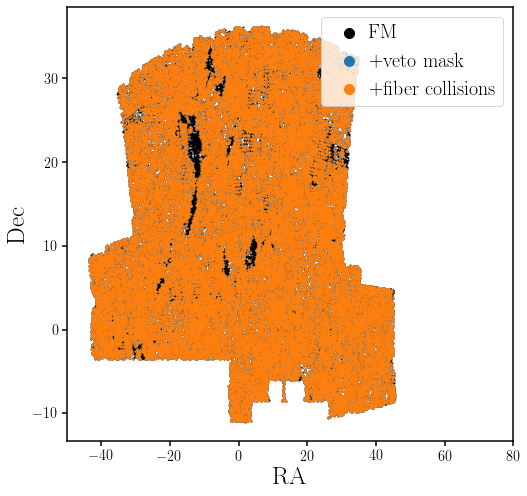

In [14]:
fig = plt.figure(figsize=(8,8))
sub = fig.add_subplot(111)
sub.scatter(np.array(gals['RA']), np.array(gals['DEC']), c='k', s=1, rasterized=True, label='FM')
sub.scatter(np.array(gals['RA'])-360, np.array(gals['DEC']), c='k', s=1, rasterized=True)
sub.scatter(np.array(gals_veto['RA']), np.array(gals_veto['DEC']), c='C0', s=1, rasterized=True, label='+veto mask')
sub.scatter(np.array(gals_veto['RA'])-360, np.array(gals_veto['DEC']), c='C0', s=1, rasterized=True)
sub.scatter(np.array(gals_veto_fc['RA']), np.array(gals_veto_fc['DEC']), c='C1', s=1, rasterized=True, label='+fiber collisions')
sub.scatter(np.array(gals_veto_fc['RA'])-360, np.array(gals_veto_fc['DEC']), c='C1', s=1, rasterized=True)
sub.legend(loc='upper right', handletextpad=0, markerscale=10, frameon=True, fontsize=20)
sub.set_xlabel('RA', fontsize=25)
sub.set_xlim(-50, 80)
sub.set_ylabel('Dec', fontsize=25)

# Now lets compare to the actual LOWZ data

In [25]:
lowz = Galaxies.BOSSGalaxies(sample='lowz-south')
zlim_lowz = (lowz['Z'] > 0.2) & (lowz['Z'] < 0.37)

Text(0, 0.5, 'Dec')

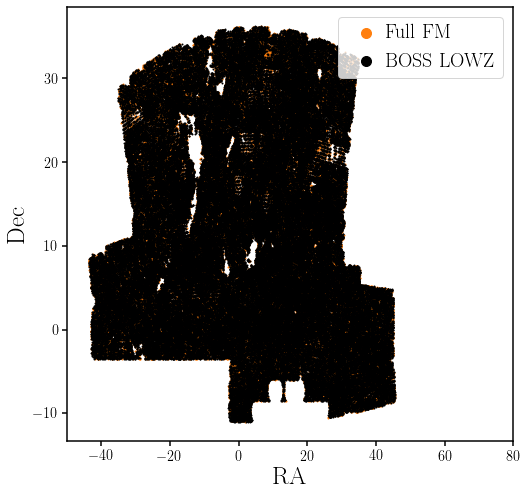

In [20]:
fig = plt.figure(figsize=(8,8))
sub = fig.add_subplot(111)
sub.scatter(np.array(gals_veto_fc['RA']), np.array(gals_veto_fc['DEC']), c='C1', s=1, rasterized=True, label='Full FM')
sub.scatter(np.array(gals_veto_fc['RA'])-360, np.array(gals_veto_fc['DEC']), c='C1', s=1, rasterized=True)

sub.scatter(np.array(lowz['RA']), np.array(lowz['DEC']), c='k', s=1, rasterized=True, label='BOSS LOWZ')
sub.scatter(np.array(lowz['RA'])-360, np.array(lowz['DEC']), c='k', s=1, rasterized=True)
sub.legend(loc='upper right', handletextpad=0, markerscale=10, frameon=True, fontsize=20)
sub.set_xlabel('RA', fontsize=25)
sub.set_xlim(-50, 80)
sub.set_ylabel('Dec', fontsize=25)

Text(0, 0.5, '$N(z)$')

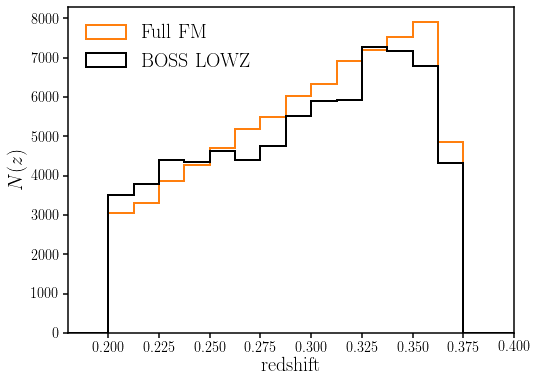

In [30]:
fig = plt.figure(figsize=(8,6))
sub = fig.add_subplot(111)
_ = sub.hist(np.array(gals_veto_fc['Z']), range=(0., 0.5), bins=40, histtype='step', linewidth=2, color='C1', label='Full FM')
_ = sub.hist(np.array(lowz['Z'][zlim_lowz]), range=(0., 0.5), bins=40, histtype='step', linewidth=2, color='k', label='BOSS LOWZ')
sub.legend(loc='upper left', fontsize=20)
sub.set_xlabel('redshift', fontsize=20)
sub.set_xlim(0.18, 0.4)
sub.set_ylabel('$N(z)$', fontsize=20)